# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as Timer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading the twitter-archice-enchanced
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# downloading the image-predictions.tsv from url using request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
#reading the downloaded image_predictions.tsv
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
#loading the tweet json files
tweets = pd.read_json('tweet-json.txt', lines=True)

In [8]:
tweets

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [9]:
tweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [10]:
#extract the needed columns and List of dictionaries to build file by file and later convert to a DataFrame
df_list = []

#reading tweet json text
with open('tweet-json.txt', 'r') as file:
    for line in file:
        each_tweet = json.loads(line)
        tweet_id = each_tweet['id']
        retweet_counts = each_tweet['retweet_count']
        favorite_counts = each_tweet['favorite_count']
        
        #append list
        df_list.append({'tweet_id': tweet_id,
                        'retweet_counts': retweet_counts,
                        'favorite_counts': favorite_counts})
        
tweet_json = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_counts', 'favorite_counts'])

In [11]:
tweet_json

,tweet_id,retweet_counts,favorite_counts
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visualization Assessment

In [12]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### twitter_archive_enchanced Columns description:

 - **tweet_id** is the unique identifier that every tweet has, it is the last part of the tweet URL after "*status*/" → https://twitter.com/dog_rates/status/889531135344209921
    
 - **in_reply_to_status_id**: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
 
 - **in_reply_to_user_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
 
 - **timestamp**: UTC time when Tweet was created
    
 - **source**: Utility used to post the Tweet, as an HTML-formatted string. Tweets from the Twitter website, Android, Iphone etc.
 
 - **text**: The actual UTF-8 text of the status update
    
 - **retweeted_status_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
    
 - **retweeted_status_user_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
    
 - **retweeted_status_timestamp**: UTC time when Tweet was retweet
    
 - **expanded_urls**: tweet URL
    
 - **rating_numerator**: numerator of the rating of a dog. Note: ratings almost always greater than 10
        
 - **rating_denominator**: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
        
 - **name**: name of the dog
    
 - **doggo**: one of the 4 dog "stage"; a big pupper usually older
    
 - **floofer**: one of the 4 dog "stage" ; dog with excess fur
    
 - **pupper**: one of the 4 dog "stage"; a small doggo usually younger
    
 - **puppo**: one of the 4 dog "stage, in between doggo and pupper usually refer a teenager


In [13]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Image_predictions Column Description
 - **tweet_id**  is the unique identifier that every tweet has, it is the last part of the tweet URL after "*status*/" → https://twitter.com/dog_rates/status/889531135344209921
 - **jpg_url** is the dog's image url
 - **img_num** is image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
 - **p1** is the algorithm's #1 prediction for the image in the tweet → **golden retriever**
 - **p1_conf** is how confident the algorithm is in its #1 prediction → **95%**
 - **p1_dog** is whether or not the #1 prediction is a breed of dog → **TRUE**
 - **p2** is the algorithm's second most likely prediction → **Labrador retriever**
 - **p2_conf** is how confident the algorithm is in its #2 prediction → 1%
 - **p2_dog** is whether or not the #2 prediction is a breed of dog → **TRUE**
 - **p3** is the algorithm's third most likely prediction
 - **p3_conf** is how confident the algorithm is in its #3 prediction
 - **p3_dog** is whether or not the #3 prediction is a breed of dog

In [14]:
tweet_json

,tweet_id,retweet_counts,favorite_counts
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


#### tweet_json Column Descriptions
 - **tweet_id**: is the unique identifier that every tweet has, it is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
        
 - **retweet_count**: is the number of times the Tweet has been retweeted
    
 - **favorite_count**: is the number of times the Tweet has been liked by Twitter users

### Programmatic Assessment

In [15]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
787,774639387460112384,NaN,NaN,2016-09-10 16:03:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sprinkles. He's trapped in light jail....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/774639387...,10,10,Sprinkles,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
1314,706901761596989440,NaN,NaN,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Elliot. He's blocking the roadway. Dow...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706901761...,3,10,Elliot,None,None,None,None
2199,668779399630725120,NaN,NaN,2015-11-23 13:13:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevon. He is not physically or mentall...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668779399...,10,10,Kevon,None,None,None,None
2272,667491009379606528,NaN,NaN,2015-11-19 23:53:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667491009...,7,10,None,None,None,None,None
616,796484825502875648,NaN,NaN,2016-11-09 22:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy doggo that requested some assi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796484825...,12,10,None,doggo,None,None,None
1609,685547936038666240,NaN,NaN,2016-01-08 19:45:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody needs to read this. Jack is our firs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685547936...,14,10,None,None,None,pupper,None
807,771908950375665664,NaN,NaN,2016-09-03 03:13:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Doggo will persevere. 13/10\nhttps://t.co/yOVz...,NaN,NaN,NaN,https://twitter.com/yahoonews/status/771905568...,13,10,None,doggo,None,None,None
1296,707969809498152960,NaN,NaN,2016-03-10 16:42:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rufus. He's a Honeysuckle Firefox. Curly ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707969809...,11,10,Rufus,None,None,None,None
609,797545162159308800,NaN,NaN,2016-11-12 21:02:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She steals things. Guilt incre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/797545162...,12,10,Cassie,None,None,None,None


In [17]:
twitter_archive.expanded_urls[0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
twitter_archive.source[714]

'<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'

In [20]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [21]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
O            1
Dylan        1
Mimosa       1
Yoda         1
Chuck        1
Name: name, Length: 957, dtype: int64

In [22]:
with pd.option_context('display.max_rows', 957):
    print(twitter_archive.name.value_counts())

None              745
a                  55
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Penny              10
Tucker             10
Lola               10
Winston             9
Bo                  9
the                 8
Sadie               8
an                  7
Daisy               7
Bailey              7
Buddy               7
Toby                7
Jack                6
Stanley             6
Jax                 6
Bella               6
Rusty               6
Oscar               6
Scout               6
Koda                6
Milo                6
Dave                6
Leo                 6
Phil                5
Oakley              5
Alfie               5
Bentley             5
George              5
Finn                5
Larry               5
very                5
Chester             5
Sunny               5
Louis               5
Gus                 5
Sammy               5
Reggie              4
Dexter              4
Maddie              4
Ruby      

In [23]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [24]:
twitter_archive.tweet_id.duplicated().sum()

0

In [25]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [26]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [27]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [28]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [29]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [30]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
tweet_json

,tweet_id,retweet_counts,favorite_counts
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [32]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_counts   2354 non-null   int64
 2   favorite_counts  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
**Twitter_archive**
1. Missing records in the following columns; 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', expanded_urls

2. Erroneous data type (`timestamp` column is in obj instead of datetime)

3. Erroneous data type (`tweet id` column is in int instead of string/object)

4. Inappropriate value for `source`. It should be Twitter for Iphone, Twitter Web Client, Vine - Make a Scene, TweetDeck

5. some name are not consistent like some 'a', 'the', 'on' etc, they are mostly in lowercase and None also is expressed as nan

**image_predictions**
1. Erroneous data type (`tweet id` column is in int instead of string/object)

2. Unify mixed writing of dog breeds in image_predictions, some lower case, some title case etc.

**tweet_json**
1. Erroneous data type (`tweet id` column is in int instead of string/object)

### Tidiness issues
***Each variable is a column***
***Each observation is a row***
***Each type of observational unit is a table***

1. One variable in four columns (doggo, floofer, pupper, puppo) in `twitter_archive` table (dog_stage)
2. One variable in two columns (rating_numerator, rating_denominator) in `twitter_archive` table (rating)
3. `twitter_achrive`, `image_predictions` and `tweet_json` should be one table because they all have characteristics of tweets.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Quality Issue #1:
***Missing Records - Twitter_archive***

Missing records in the following columns; 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', expanded_urls

#### Define:
Drop the 6 columns (in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', expanded_urls) with nan since they are only associated to retweet and replies and they won't be need for our analysis

#### Code

In [34]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                    'retweeted_status_id', 'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

#### Test

In [35]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Tidness Issue #2:
One variable in four columns (doggo, floofer, pupper, puppo) in `twitter_archive` table (dog_stage)

#### Define
Create a new variable called `dog_stage` to show the four dog stages *doggo*, *floofer*, *pupper* and *puppo*, and and fill the empty with *np.nan*.

#### Code

In [36]:
# replace 'None' with an empty string for easy concatenation
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

In [37]:
# concatenation of all doggo, floofer, pupper and puppo columns as one column; dog_stage
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

In [38]:
# remove rows that have multiple dog stage 
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.dog_stage != 'doggopupper']
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.dog_stage != 'doggopuppo']
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.dog_stage != 'doggofloofer']

In [39]:
# replacing empty value in dog_stage with Nan
twitter_archive_clean['dog_stage'] = twitter_archive_clean.dog_stage.replace('', np.nan)

In [40]:
#  drop doggo, floofer, pupper and puppo columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [41]:
twitter_archive_clean['dog_stage'].value_counts()

pupper     245
doggo       83
puppo       29
floofer      9
Name: dog_stage, dtype: int64

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2342 non-null   int64 
 1   timestamp           2342 non-null   object
 2   source              2342 non-null   object
 3   text                2342 non-null   object
 4   rating_numerator    2342 non-null   int64 
 5   rating_denominator  2342 non-null   int64 
 6   name                2342 non-null   object
 7   dog_stage           366 non-null    object
dtypes: int64(3), object(5)
memory usage: 164.7+ KB


### Tidness Issue #3:

One variable in two columns (rating_numerator, rating_denominator) in `twitter_archive` table (rating)

#### Define
create a new columns `rating` by dividing *rating_numerator* by *rating_denominator*

#### Code

In [43]:
# divide the numerator by the denominator
twitter_archive_clean['rating'] = twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator

In [44]:
# drop the rating_numerator and rating_denominator
twitter_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis=True, inplace=True)

In [45]:
# round up to 1 decimal place
twitter_archive_clean['rating'] = twitter_archive_clean['rating'].round(1)

In [46]:
# drop any rows of rating greater than 1.5
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating'] <= 1.5]

#### Test

In [47]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,name,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,NaN,1.2


In [48]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   2330 non-null   int64  
 1   timestamp  2330 non-null   object 
 2   source     2330 non-null   object 
 3   text       2330 non-null   object 
 4   name       2330 non-null   object 
 5   dog_stage  365 non-null    object 
 6   rating     2330 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 145.6+ KB


In [49]:
twitter_archive_clean.describe()

,tweet_id,rating
count,2.330000e+03,2330.000000
mean,7.422130e+17,1.068670
std,6.852458e+16,0.219168
min,6.660209e+17,0.000000
25%,6.782926e+17,1.000000
50%,7.183508e+17,1.100000
75%,7.987010e+17,1.200000
max,8.924206e+17,1.500000


In [50]:
twitter_archive_clean.rating.sort_values()

315     0.0
1016    0.0
2338    0.1
2261    0.1
2038    0.1
       ... 
117     1.4
268     1.4
589     1.4
285     1.5
291     1.5
Name: rating, Length: 2330, dtype: float64

In [51]:
twitter_archive_clean.rating.value_counts()

1.2    555
1.1    467
1.0    462
1.3    349
0.9    157
0.8    104
0.7     55
1.4     54
0.5     37
0.6     33
0.3     19
0.4     15
0.2     11
0.1      8
0.0      2
1.5      2
Name: rating, dtype: int64

### Tidness Issue #4:

`twitter_achrive`, `image_predictions` and `tweet_json` should be one table because they all have characteristics of tweets.

#### Define
merge the three table as one table df

#### Code

In [52]:
all_columns = list(twitter_archive_clean.columns) + list(image_predictions_clean.columns) + list(tweet_json_clean.columns)
all_columns

['tweet_id',
 'timestamp',
 'source',
 'text',
 'name',
 'dog_stage',
 'rating',
 'tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'tweet_id',
 'retweet_counts',
 'favorite_counts']

In [53]:
# merging twitter_archive_clean, image_predictions_clean and tweet_json_clean on tweet_id
df = pd.merge(pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id'), tweet_json_clean, on='tweet_id')

#### Test

In [54]:
df.head()

,tweet_id,timestamp,source,text,name,dog_stage,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_counts,favorite_counts
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2053
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2054 non-null   int64  
 1   timestamp        2054 non-null   object 
 2   source           2054 non-null   object 
 3   text             2054 non-null   object 
 4   name             2054 non-null   object 
 5   dog_stage        306 non-null    object 
 6   rating           2054 non-null   float64
 7   jpg_url          2054 non-null   object 
 8   img_num          2054 non-null   int64  
 9   p1               2054 non-null   object 
 10  p1_conf          2054 non-null   float64
 11  p1_dog           2054 non-null   bool   
 12  p2               2054 non-null   object 
 13  p2_conf          2054 non-null   float64
 14  p2_dog           2054 non-null   bool   
 15  p3               2054 non-null   object 
 16  p3_conf          2054 non-null   float64
 17  p3_dog        

### Quality Issue #5:

Erroneous data type (`timestamp` column is in obj instead of datetime)

#### Define
Convert timestamp data type to datetime

#### Code

In [56]:
# timestamp to datetime format
df['timestamp'] = pd.to_datetime(df.timestamp)

#### Test

In [57]:
df.head(2)

,tweet_id,timestamp,source,text,name,dog_stage,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_counts,favorite_counts
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2053
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         2054 non-null   int64              
 1   timestamp        2054 non-null   datetime64[ns, UTC]
 2   source           2054 non-null   object             
 3   text             2054 non-null   object             
 4   name             2054 non-null   object             
 5   dog_stage        306 non-null    object             
 6   rating           2054 non-null   float64            
 7   jpg_url          2054 non-null   object             
 8   img_num          2054 non-null   int64              
 9   p1               2054 non-null   object             
 10  p1_conf          2054 non-null   float64            
 11  p1_dog           2054 non-null   bool               
 12  p2               2054 non-null   object             
 13  p2_conf          2

### Quality Issue #6:

Erroneous data type (`tweet id` column is in int instead of string/object)

#### Define
Convert `tweet_id` data type to string

#### Code

In [59]:
# tweet_id to string
df['tweet_id'] = df.tweet_id.astype(str)

#### Test

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2053
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         2054 non-null   object             
 1   timestamp        2054 non-null   datetime64[ns, UTC]
 2   source           2054 non-null   object             
 3   text             2054 non-null   object             
 4   name             2054 non-null   object             
 5   dog_stage        306 non-null    object             
 6   rating           2054 non-null   float64            
 7   jpg_url          2054 non-null   object             
 8   img_num          2054 non-null   int64              
 9   p1               2054 non-null   object             
 10  p1_conf          2054 non-null   float64            
 11  p1_dog           2054 non-null   bool               
 12  p2               2054 non-null   object             
 13  p2_conf          2

### Quality Issue #7:
Inappropriate value for `source`. It should be Twitter for Iphone, Twitter Web Client, Vine - Make a Scene, TweetDeck

#### Define
extract the main source from the hyper link

#### Code

In [61]:
# checking for the value counts of source
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2014
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [62]:
#replacing the hyperlink to readable actual source i.e Iphone, Web, TweetDeck. Vine will 
#be ignored since it has been removed with other rows when cleaning.
df.loc[df.source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'source'] = 'iPhone'
df.loc[df.source == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'source'] = 'Web'
df.loc[df.source == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'source'] = 'TweetDeck'

#### Test

In [63]:
df.source.value_counts()

iPhone       2014
Web            30
TweetDeck      10
Name: source, dtype: int64

In [64]:
df.sample(2)

,tweet_id,timestamp,source,text,name,dog_stage,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_counts,favorite_counts
1126,702932127499816960,2016-02-25 19:04:13+00:00,iPhone,This is Chip. He's an Upper West Nile Pantaloo...,Chip,NaN,0.6,https://pbs.twimg.com/media/CcFRCfRW4AA5a72.jpg,1,wallaby,0.410710,False,wombat,0.239332,False,beaver,0.149605,False,811,2825
379,815966073409433600,2017-01-02 17:00:46+00:00,iPhone,Here's a pupper with squeaky hiccups. Please e...,None,pupper,1.3,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True,9907,25057


### Quality Issue #8:
Some name are not consistent like some 'a', 'the', 'on' etc, they are mostly in lowercase and None also is expressed as nan

#### Define
List out word or letter that start with lowercase and replace with nan

Replace none with nan

#### Code

In [65]:
# List out word or letter that start with lowercase
not_name = []

for word in df.name:
    if word.islower() and word not in not_name:
        not_name.append(word)
    
print(not_name)

['such', 'a', 'quite', 'one', 'incredibly', 'an', 'very', 'my', 'not', 'his', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'just', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [66]:
# replace all the not_name with np.nan
df.name.replace(not_name, np.nan, inplace=True)

# replace none with np.nan
df.name.replace('None', np.nan, inplace=True)

#### Test

In [67]:
df.name.value_counts()

Charlie    11
Penny      10
Oliver     10
Lucy       10
Cooper     10
           ..
Levi        1
Pubert      1
Monster     1
Brandi      1
Stuart      1
Name: name, Length: 909, dtype: int64

In [68]:
df.name.isna().sum()

666

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2053
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         2054 non-null   object             
 1   timestamp        2054 non-null   datetime64[ns, UTC]
 2   source           2054 non-null   object             
 3   text             2054 non-null   object             
 4   name             1388 non-null   object             
 5   dog_stage        306 non-null    object             
 6   rating           2054 non-null   float64            
 7   jpg_url          2054 non-null   object             
 8   img_num          2054 non-null   int64              
 9   p1               2054 non-null   object             
 10  p1_conf          2054 non-null   float64            
 11  p1_dog           2054 non-null   bool               
 12  p2               2054 non-null   object             
 13  p2_conf          2

In [70]:
df.name.isin(not_name).any()

False

### Quality Issue #9:
Unify mixed writing of dog breeds in image_predictions, some lower case, some title case etc.

#### Define
Remove the underscores and replace with space, then make the words title case

#### Code

In [71]:
#previewing the dog_breeds
df[['p1', 'p2', 'p3']]

,p1,p2,p3
0,orange,bagel,banana
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
3,paper_towel,Labrador_retriever,spatula
4,basset,English_springer,German_short-haired_pointer
...,...,...,...
2049,miniature_pinscher,Rottweiler,Doberman
2050,Rhodesian_ridgeback,redbone,miniature_pinscher
2051,German_shepherd,malinois,bloodhound
2052,redbone,miniature_pinscher,Rhodesian_ridgeback


In [72]:
# replace underscore with space and convert to title case
df['p1'] = df['p1'].str.replace('_', ' ').str.title()
df['p2'] = df['p2'].str.replace('_', ' ').str.title()
df['p3'] = df['p3'].str.replace('_', ' ').str.title()

#### Test

In [73]:
df[['p1', 'p2', 'p3']].sample(4)

,p1,p2,p3
380,Border Collie,Cardigan,Collie
1999,Golden Retriever,Labrador Retriever,Seat Belt
209,Tub,Bucket,Labrador Retriever
1466,Kelpie,Beagle,Basset


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2053
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         2054 non-null   object             
 1   timestamp        2054 non-null   datetime64[ns, UTC]
 2   source           2054 non-null   object             
 3   text             2054 non-null   object             
 4   name             1388 non-null   object             
 5   dog_stage        306 non-null    object             
 6   rating           2054 non-null   float64            
 7   jpg_url          2054 non-null   object             
 8   img_num          2054 non-null   int64              
 9   p1               2054 non-null   object             
 10  p1_conf          2054 non-null   float64            
 11  p1_dog           2054 non-null   bool               
 12  p2               2054 non-null   object             
 13  p2_conf          2

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [75]:
# save df to csv file
df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [76]:
master_df = pd.read_csv('twitter_archive_master.csv')

In [77]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2054 non-null   int64  
 1   timestamp        2054 non-null   object 
 2   source           2054 non-null   object 
 3   text             2054 non-null   object 
 4   name             1388 non-null   object 
 5   dog_stage        306 non-null    object 
 6   rating           2054 non-null   float64
 7   jpg_url          2054 non-null   object 
 8   img_num          2054 non-null   int64  
 9   p1               2054 non-null   object 
 10  p1_conf          2054 non-null   float64
 11  p1_dog           2054 non-null   bool   
 12  p2               2054 non-null   object 
 13  p2_conf          2054 non-null   float64
 14  p2_dog           2054 non-null   bool   
 15  p3               2054 non-null   object 
 16  p3_conf          2054 non-null   float64
 17  p3_dog        

In [78]:
master_df.describe()

,tweet_id,rating,img_num,p1_conf,p2_conf,p3_conf,retweet_counts,favorite_counts
count,2.054000e+03,2054.000000,2054.000000,2054.000000,2.054000e+03,2.054000e+03,2054.000000,2054.000000
mean,7.380205e+17,1.058812,1.204966,0.593546,1.351351e-01,6.049440e-02,2955.533106,8525.455696
std,6.786647e+16,0.218345,0.563852,0.271085,1.008135e-01,5.098306e-02,5043.228683,12088.144121
min,6.660209e+17,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,0.000000
25%,6.762439e+17,1.000000,1.000000,0.363272,5.432547e-02,1.628435e-02,629.500000,1662.000000
50%,7.110026e+17,1.100000,1.000000,0.587635,1.192560e-01,4.952715e-02,1391.500000,3836.000000
75%,7.931619e+17,1.200000,1.000000,0.841725,1.963873e-01,9.208967e-02,3438.250000,10929.000000
max,8.924206e+17,1.500000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


### Insights:
1. It seem the p1_conf seems to be strong compare to p2_conf, p3_conf

2. The img_num 1 seem like more importance is been place on it.

3. The retweet_counts is at average of 2956, and it has minimum of 16 and maximum of 79515

4. The favorite_counts is at average of 8525, and it has minimum of 0 and maximum of 132810

5. The average rating of dog is 1.06

### Visualization

C:\Users\Oluwatosin\anaconda3\envs\ALxD\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The Distribution of Tweet Image Number')

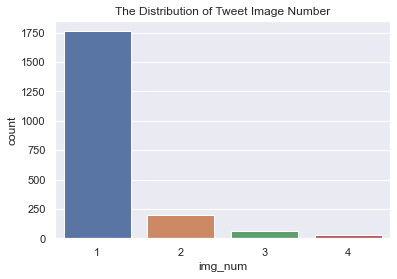

In [79]:
sns.set_theme(style="darkgrid")
sns.countplot(master_df.img_num)
plt.title('The Distribution of Tweet Image Number')

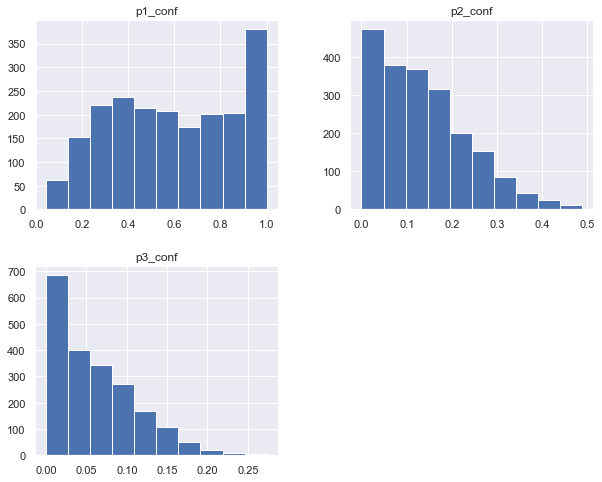

In [80]:
master_df[['p1_conf', 'p2_conf', 'p3_conf']].hist(figsize=(10,8));

In [81]:
master_df.dog_stage.value_counts()

pupper     209
doggo       67
puppo       23
floofer      7
Name: dog_stage, dtype: int64

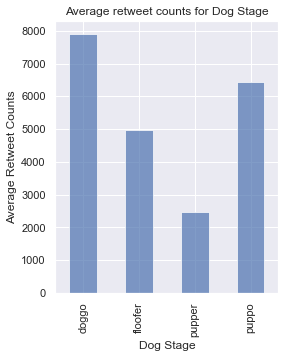

In [82]:
average_retweet_counts = master_df.groupby('dog_stage').retweet_counts.mean()
average_retweet_counts.plot(kind='bar', title='Average retweet counts for Dog Stage', alpha=.7, figsize=(4,5))
plt.xlabel('Dog Stage')
plt.ylabel('Average Retweet Counts');

- Dogs at stage doggo seem to have more retweet counts at average, follow by puppo compare to others

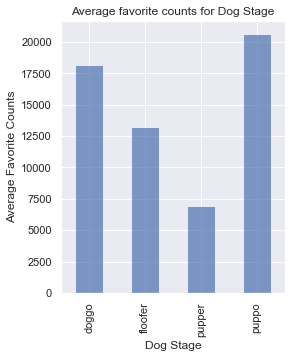

In [83]:
average_favorite_counts = master_df.groupby('dog_stage').favorite_counts.mean()
average_favorite_counts.plot(kind='bar', title='Average favorite counts for Dog Stage',  alpha=.7, figsize=(4,5))
plt.xlabel('Dog Stage')
plt.ylabel('Average Favorite Counts');

- Dog at stage puppo seem to gain the like of people compare to others, and this might be because of their beauty at younger age

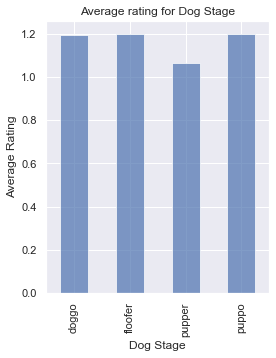

In [84]:
average_rating = master_df.groupby('dog_stage').rating.mean()
average_rating.plot(kind='bar', title='Average rating for Dog Stage',  alpha=.7, figsize=(4,5))
plt.xlabel('Dog Stage')
plt.ylabel('Average Rating');

In [85]:
master_df.groupby('dog_stage').rating.mean()

dog_stage
doggo      1.197015
floofer    1.200000
pupper     1.067464
puppo      1.200000
Name: rating, dtype: float64